# Analysis of Natural Gas Transportation Rates

## Introduction

### Brief description
The project's purpose is to explore the records of Natural Gas Transportation Rates in Mexico (2016-2017), aiming to find valuable insights and gain a comprehensive overview of the changes over time.

### Objectives
* Visualize the change of Natural Gas Transportation Rates over time.
* Find valuable insight that give us a more comprehensive perspective.

### Data dictionary
| Campo                         | Data Type | Description                                                                                                                                                                                                                                       |
|-------------------------------|-----------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| zona                          | String    | Geographical division of the National Integrated Transportation and Storage System (SISTRANGAS), for tariff purposes. Currently, SISTRANGAS is divided into six zones: Norte, Golfo, Centro, Occidente, Sur, Istmo, Nacional and Nacional con AB. |
| capacidad_base_firme          | Float     | Rate applicable to users who have contracted the service on a firm basis, must be paid according to the maximum daily capacity reserved.                                                                                                          |
| uso_base_firme                | Float     | Rate applicable to users who have contracted the service on a firm basis, must be paid according to the energy actually transported.                                                                                                              |
| capacidad_base_firme_temporal | Float     | Rate applicable only to users who enter into an investment agreement, in terms of what is established in RES/262/2004.                                                                                                                            |
| uso_base_firme_temporal       | Float     | Rate applicable only to users who enter into an investment agreement, in terms of what is established in RES/262/2004.                                                                                                                            |
| capacidad_base_interrumpible  | Float     | Rate applicable to users who have contracted the service on an interruptible basis.                                                                                                                                                               |
| uso_base_interrumpible        | Float     | Rate applicable to users who have contracted the service on an interruptible basis.                                                                                                                                                               |
| volumetrica                   | Float     | Rate applicable to users who chose to remain in the Transitional Regime and received a volumetric service (RES/406/2007).                                                                                                                         |
| fecha_inicio                  | Fecha     | Start date of the tariff's validity.                                                                                                                                                                                                              |
| fecha_fin                     | Fecha     | End date of the tariff's validity.                                                                                                                                                                                                                |

## Environment Configuration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Acquisition and Cleaning

Load dataset

In [2]:
# Load data from csv
df = pd.read_csv('../data/Tarifas por zonas 2016-2017.csv')

# Preview of first records
df.head()

,zona,capacidad_base_firme,uso_base_firme,capacidad_base_temporal,uso_base_temporal,maxima_base_interrumpible,minima_base_interrumpible,volumetrica,fecha_inicio,fecha_fin
0,Sur,1.52306,0.01585,1.53894,0.01585,1.52392,0.01585,1.64799,2016-01-01,2016-03-31
1,Centro,2.84902,0.03021,2.87937,0.03021,2.85117,0.03021,3.08510,2016-01-01,2016-03-31
2,Occidente,1.57302,0.01552,1.58855,0.01552,1.57293,0.01552,1.70009,2016-01-01,2016-03-31
3,Golfo,3.06847,0.02751,3.09649,0.02751,3.06658,0.02751,3.30889,2016-01-01,2016-03-31
4,Norte,4.34706,0.04460,4.39141,0.04460,4.34791,0.04460,4.70128,2016-01-01,2016-03-31


Initial exploration

In [3]:
# General information about the dataframe
df.info()

# Descriptive Statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   zona                       72 non-null     object 
 1   capacidad_base_firme       72 non-null     float64
 2   uso_base_firme             72 non-null     float64
 3   capacidad_base_temporal    72 non-null     float64
 4   uso_base_temporal          72 non-null     float64
 5   maxima_base_interrumpible  72 non-null     float64
 6   minima_base_interrumpible  72 non-null     float64
 7   volumetrica                72 non-null     float64
 8   fecha_inicio               72 non-null     object 
 9   fecha_fin                  72 non-null     object 
dtypes: float64(7), object(3)
memory usage: 5.8+ KB


,capacidad_base_firme,uso_base_firme,capacidad_base_temporal,uso_base_temporal,maxima_base_interrumpible,minima_base_interrumpible,volumetrica
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,3.540788,0.022934,3.563749,0.022934,3.529235,0.022934,3.922467
std,2.272785,0.016997,2.288314,0.016997,2.265890,0.016997,2.578491
min,-0.723230,0.000000,-0.723230,0.000000,-0.716070,0.000000,-0.791390
25%,1.740525,0.011640,1.744407,0.011640,1.727160,0.011640,1.899223
50%,3.691680,0.022320,3.714620,0.022320,3.678045,0.022320,4.037400
75%,5.227760,0.035340,5.258040,0.035340,5.206790,0.035340,5.717710
max,7.259570,0.048210,7.306250,0.048210,7.235310,0.048210,8.449190


Data cleaning

In [4]:
# Eliminate duplicates
df.drop_duplicates(inplace=True)

# Convert 'fecha_inicio' column to datetime format
df['fecha_inicio'] = pd.to_datetime(df['fecha_inicio'])
# Convert 'fecha_fin' column to datetime format
df['fecha_fin'] = pd.to_datetime(df['fecha_fin'])

## Exploratory Data Analysis (EDA)

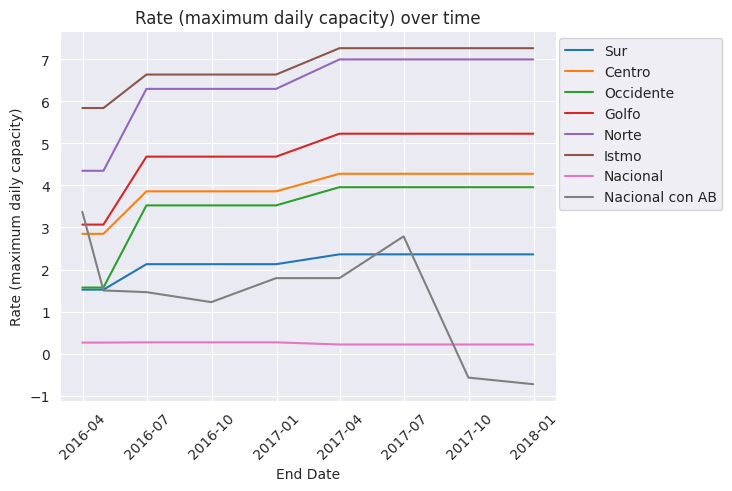

In [16]:
df_time_sorted = df.sort_values('fecha_fin')

sns.lineplot(data=df_time_sorted, hue='zona',  x='fecha_fin', y='capacidad_base_firme')
plt.title('Rate (maximum daily capacity) over time')
plt.xticks(rotation=45)
plt.xlabel('End Date')
plt.ylabel('Rate (maximum daily capacity)')
plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right')
plt.show()

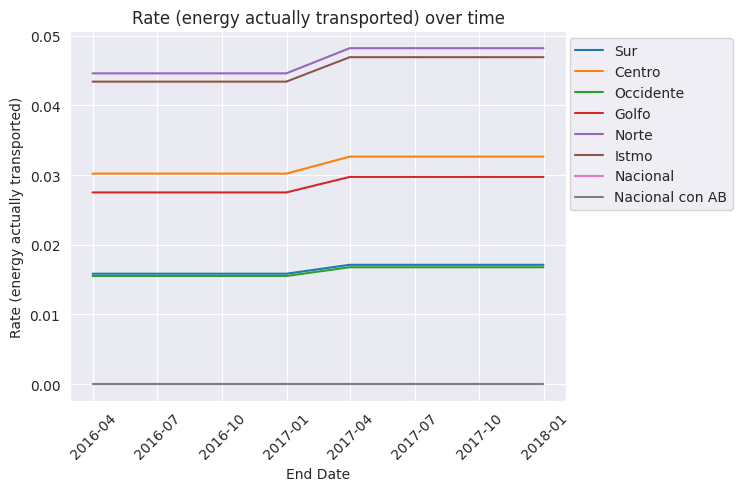

In [17]:
df_time_sorted = df.sort_values('fecha_fin')

sns.lineplot(data=df_time_sorted, hue='zona',  x='fecha_fin', y='uso_base_firme')
plt.title('Rate (energy actually transported) over time')
plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right')
plt.xticks(rotation=45)
plt.xlabel('End Date')
plt.ylabel('Rate (energy actually transported)')
plt.show()